First, we’ll start by importing the necessary libraries to the notebook and convert the `.csv` file to the pandas data frame.

In [4]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import seaborn as sns
# Importing dataset and converting to pandas dataframe
#titanic = pd.read_csv("train.csv")
#titanic.head()
# load the titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Our target variable is Survived

Let's inspect the data a bit closer using `.shape`, `.describe` and `.info` methods.

In [5]:
# Let's check the dimensions of the dataframe
print(titanic.shape)
print()
# let's look at the statistical aspects of the dataframe
print(titanic.describe())
print()
# Let's see the type of each column
print(titanic.info())

(891, 15)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex 

So we have 12 variables -1 for our target so that's 11 variables column 5, 10 and 11 have some missing data as well

Both column 10 and 11 are not numerical so we can ignore them. 
As for column 5 we're going to use mean imputing to impute the missing data later.
First let's get rid of all the columns we're not going to use

In [6]:
titanic = titanic.drop("Name", axis=1)
titanic = titanic.drop("Cabin", axis=1)
titanic = titanic.drop("Embarked", axis=1)
titanic = titanic.drop("Ticket", axis=1)
titanic = titanic.drop("PassengerId", axis=1)
titanic.head()

KeyError: "['Name'] not found in axis"

We are not getting rid of the `Sex` column because that variable has only 2 classes so they can be easily transformed into 1s and 0s 

In [ ]:
titanic = titanic.replace(to_replace=["male", "female"], value=[0, 1])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


Let's check for any outliers!

In [ ]:
titanic[["Fare", "Age"]].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
90%,77.958300,50.000000
95%,112.079150,56.000000
99%,249.006220,65.870000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


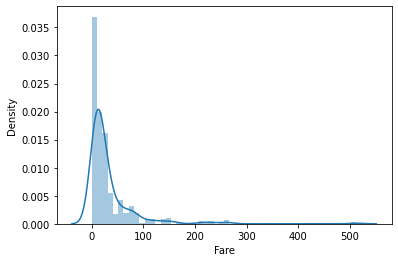

In [ ]:
sns.distplot(titanic["Fare"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


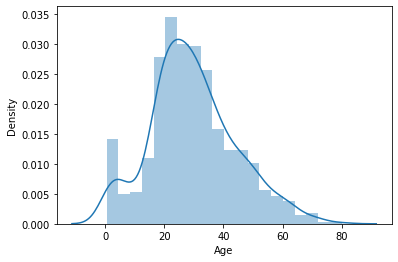

In [ ]:
sns.distplot(titanic["Age"])

Let's check for null values now

In [ ]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

177 values is quite a bit so let's attempt to fill them in.
First we need to replace all the NaN values by np.nan as that works better with sklearn

In [ ]:
titanic = titanic.fillna(np.nan)

Now we can use sklearn's `SimpleImputer`

In [ ]:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
titanic = pd.DataFrame(imp.fit_transform(titanic), columns=titanic.columns)

In [ ]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

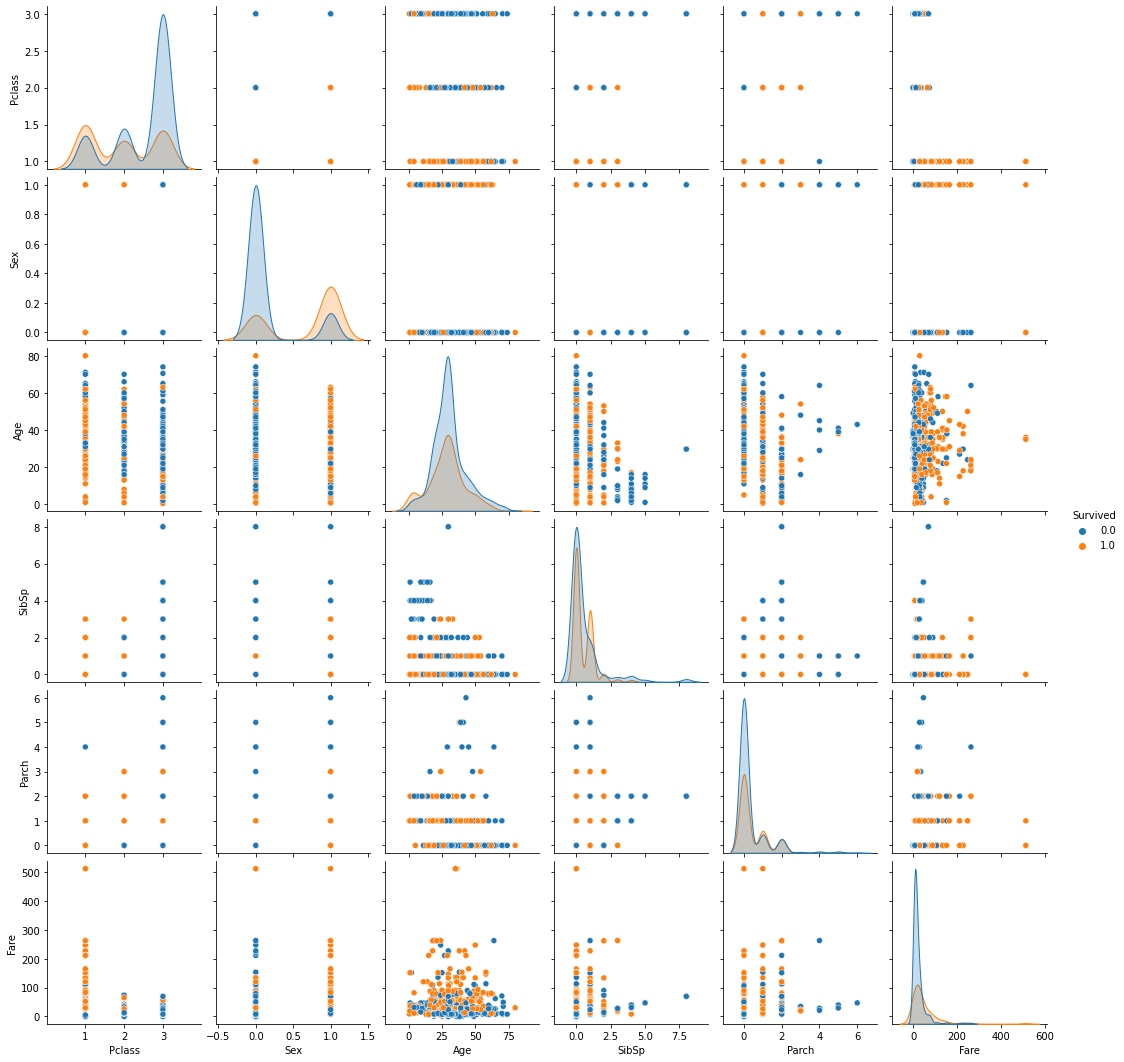

In [ ]:
sns.pairplot(titanic, hue="Survived")

No NaN values left!

By using the sklearn library, we’ll import the test_train_split to split the data. But before splitting the data, we’ll divide the dataset into two dataframes X and y.

We can also drop the `PassengerID` column since it doesn't give us any useful information

In [ ]:

from sklearn.model_selection import train_test_split

X = titanic.drop(["Survived"], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,3.0,0.0,35.0,0.0,0.0,8.0500


In [ ]:
y = titanic["Survived"]

y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

Now we can split the data into a train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Since we have 2 continous variables we can use a scaler so that the data is more comparable

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[["Age", "Fare"]] = scaler.fit_transform(X_train[["Age", "Fare"]])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
69,3.0,0.0,-0.310894,2.0,0.0,-0.462475
85,3.0,1.0,0.234871,3.0,0.0,-0.324753
794,3.0,0.0,-0.388861,0.0,0.0,-0.477166
161,2.0,1.0,0.780636,0.0,0.0,-0.326669
815,1.0,0.0,-0.022487,0.0,0.0,-0.628459


Let's look at the survival rate now

In [ ]:
survive = (sum(titanic['Survived'])/len(titanic['Survived'].index))*100
survive

38.38383838383838

That's only a 38% survive rate, that isn't great



Let’s look at the correlation between the variables. Suppose the correlation is high between the variables. In that case, we can remove the columns because if two variables are highly correlated, then there is no need to build the model using both the variables. We can explain the target variable using one of these two variables

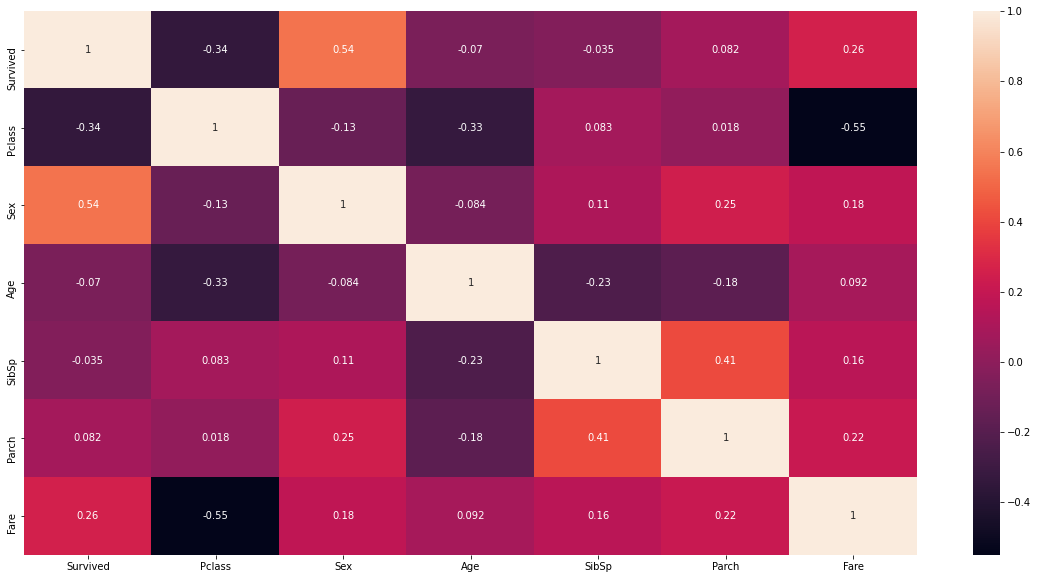

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(titanic.corr(),annot = True)
plt.show()

We’ll use the `statsmodel` library to build our first model. Let’s see how our model looks like if we consider all the variables.

In [ ]:
# Importing libraries to build the moddel
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
# Logistic regression model
logm1 = sm.GLM(y_train,(X_train_sm), family = sm.families.Binomial())

res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      616
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.97
Date:                Fri, 26 Feb 2021   Deviance:                       539.94
Time:                        12:46:30   Pearson chi2:                     648.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9947      0.361      2.757      0.006       0.287       1.702
Pclass        -1.0837      0.166     -6.534      0.000      -1.409      -0.759
Sex            2.9031      0.244     11.888      0.000       2.424       3.382
Age           -0.5039      0.124     -4.049      0.000      -0.748      -0.260
SibSp         -0.2953      0.125     -2.365      0.018      -0.540      -0.051
Parch         -0.2543      0.152     -1.678      0.093      -0.551       0.043
Fare           0.1830      0.141      1.301      0.193      -0.093       0.459
==============================================================================
"""

We can use the predict function to se what the model predicts for the train data 

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

69     0.058693
85     0.397250
794    0.104534
161    0.781973
815    0.451978
516    0.816755
299    0.925984
454    0.088515
59     0.030893
879    0.847414
dtype: float64

Now, let’s create a dataframe with the actual Survive column and the predicted probabilities.

In [ ]:
y_train_pred_final = pd.DataFrame({'Survive':y_train.values, 'Survive_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = titanic['PassengerId']
y_train_pred_final.head()

,Survive,Survive_Prob,PassengerId
69,0.0,0.058693,70.0
85,1.0,0.397250,86.0
794,0.0,0.104534,795.0
161,1.0,0.781973,162.0
815,0.0,0.451978,816.0


Since the logistic curve gives us the probabilities and not the actual classification of ‘Survived’ and ‘Not Survived,’ we need to find a threshold probability to classify customers as 'Survived' and ‘not Survived.’

Here, let’s choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer not surviving is less than 0.5, we’d classify it as ‘Not_Survived,’ and if it’s greater than 0.5, we will classify it as 'Survived'.

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Survive_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the dataframe
y_train_pred_final.head()

,Survive,Survive_Prob,PassengerId,predicted
69,0.0,0.058693,70.0,0
85,1.0,0.397250,86.0,0
794,0.0,0.104534,795.0,0
161,1.0,0.781973,162.0,1
815,0.0,0.451978,816.0,0


We’ll encounter two types of errors:

    ‘Survived’ individuals being incorrectly classified as ‘Not Survived.’
    ‘Not Survived’ individuals being incorrectly classified as ‘Survived.’


To find these errors and the model’s wellness, we’ll use a phenomenon called ‘Confusion Matrix.’

We can create this confusion matrix in python by importing the `metrics` library from the `sklearn`

In [ ]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survive, y_train_pred_final.predicted )
print(confusion)

[[343  47]
 [ 68 165]]


There are many ways to evaluate the model; one of the metrics we measure for the above model is accuracy.

We can calculate the accuracy using python directly,

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Survive, y_train_pred_final.predicted))

0.8154093097913323


Now, let’s find out the values of Sensitivity and Specificity

First, we’ll assign the TP, TN, FP, and FN values from our confusion matrix

In [ ]:
# Assigning the values from our matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ', TN / float(TN+FP))

Sensitivity:  0.7081545064377682
Specificity:  0.8794871794871795


In our problem, we are trying to find the optimal cutoff where there will be a balance between sensitivity and specificity. To do that first, we’ll find the predicted values for different cutoffs from 0.1 to 0.9

In [ ]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Survive_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survive,Survive_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
69,0.0,0.058693,70.0,0,1,0,0,0,0,0,0,0,0,0
85,1.0,0.397250,86.0,0,1,1,1,1,0,0,0,0,0,0
794,0.0,0.104534,795.0,0,1,1,0,0,0,0,0,0,0,0
161,1.0,0.781973,162.0,1,1,1,1,1,1,1,1,1,0,0
815,0.0,0.451978,816.0,0,1,1,1,1,1,0,0,0,0,0


Now, let’s calculate the accuracy, sensitivity, and specificity of these cutoff values.

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survive, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373997  1.000000  0.000000
0.1   0.1  0.595506  0.927039  0.397436
0.2   0.2  0.719101  0.858369  0.635897
0.3   0.3  0.770465  0.819742  0.741026
0.4   0.4  0.788122  0.759657  0.805128
0.5   0.5  0.815409  0.708155  0.879487
0.6   0.6  0.815409  0.630901  0.925641
0.7   0.7  0.799358  0.519313  0.966667
0.8   0.8  0.772071  0.407725  0.989744
0.9   0.9  0.696629  0.197425  0.994872


Let’s plot a line graph and see how the accuracy, sensitivity, and specificity behave at those probabilities.

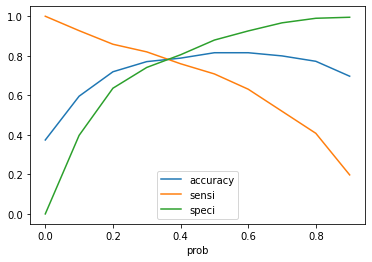

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 or slightly less is the optimum point to take it as a cutoff probability. We’ll consider 0.4 as the cutoff for ease of understanding.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survive_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Survive,Survive_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
69,0.0,0.058693,70.0,0,1,0,0,0,0,0,0,0,0,0,0
85,1.0,0.397250,86.0,0,1,1,1,1,0,0,0,0,0,0,0
794,0.0,0.104534,795.0,0,1,1,0,0,0,0,0,0,0,0,0
161,1.0,0.781973,162.0,1,1,1,1,1,1,1,1,1,0,0,1
815,0.0,0.451978,816.0,0,1,1,1,1,1,0,0,0,0,0,1


In [ ]:
# Let's check the overall accuracy.
print('Accuracy: ', metrics.accuracy_score(y_train_pred_final.Survive, y_train_pred_final.final_predicted))

# Confusion matrix for the final model
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survive, y_train_pred_final.final_predicted )
print(confusion2)

# Assigning values
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# The sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ', TN / float(TN+FP))

Accuracy:  0.7881219903691814
[[314  76]
 [ 56 177]]
Sensitivity:  0.759656652360515
Specificity:  0.8051282051282052


Let’s make predictions on the test data using our final model. First, we’ll scale the test data similar to the one we did on train data after splitting.

In [ ]:
scaler = StandardScaler()

X_test[["Age", "Fare"]] = scaler.fit_transform(X_test[["Age", "Fare"]])

X_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

,Pclass,Sex,Age,SibSp,Parch,Fare
205,3.0,1.0,-2.023924,0.0,1.0,-0.471268
44,3.0,1.0,-0.750952,0.0,0.0,-0.531062
821,3.0,0.0,-0.151906,0.0,0.0,-0.512931
458,2.0,1.0,1.570350,0.0,0.0,-0.470400
795,2.0,0.0,0.746662,0.0,0.0,-0.412534


Let’s make predictions now on test data

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Converting y_test_pred we got above to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Similarly converting y_test which we have when we split the data to dataframe
y_test_df = pd.DataFrame(y_test)

# Making CustID an index
y_test_df['PassengerId'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Final dataset
y_pred_final.head()

,Survived,PassengerId,0
0,0.0,205,0.790174
1,1.0,44,0.716637
2,1.0,821,0.093318
3,1.0,458,0.701187
4,0.0,795,0.164590


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survive_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['PassengerId','Survived','Survive_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,PassengerId,Survived,Survive_Prob
0,205,0.0,0.790174
1,44,1.0,0.716637
2,821,1.0,0.093318
3,458,1.0,0.701187
4,795,0.0,0.164590


Let’s predict the model using 0.4 as cutoff, which we got earlier on the train dataset.

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Survive_Prob.map(lambda x: 1 ife x > 0.4 lse 0)
y_pred_final.head()

,PassengerId,Survived,Survive_Prob,final_predicted
0,205,0.0,0.790174,1
1,44,1.0,0.716637,1
2,821,1.0,0.093318,0
3,458,1.0,0.701187,1
4,795,0.0,0.164590,0


Let’s check the accuracy, sensitivity, and specificity values for the test data and compare it.

In [ ]:
# Checking the overall accuracy.
print('Accuracy: ', metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted))

# Checking the Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
print(confusion2)

# Assigning the values from the matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ', TN / float(TN+FP))

Accuracy:  0.7910447761194029
[[133  26]
 [ 30  79]]
Sensitivity:  0.7247706422018348
Specificity:  0.8364779874213837


In [ ]:
y_pred_final.head()

,PassengerId,Survived,Survive_Prob,final_predicted
0,205,0.0,0.790174,1
1,44,1.0,0.716637,1
2,821,1.0,0.093318,0
3,458,1.0,0.701187,1
4,795,0.0,0.164590,0


Let's calculate the ROC curve as well for the fun of it. Normally you wouldn't want to do this on a dataset with imbalanced classes like this one because it can show you an overly optimistic picture of your model. But just as an example let's do it anyways

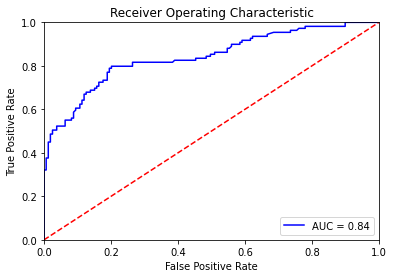

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_final.Survive_Prob)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

If we compare the training dataset’s accuracy, sensitivity, and specificity values, there is not that much of a change. So the model we have built is good enough to predict any future titanic data.